In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

tf.test.gpu_device_name()


from tensorflow.keras import layers,callbacks, models


import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label



#from tensorflow.keras import backend as K
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

2.0.0
2.2.4-tf


In [0]:
if 'COLAB_TPU_ADDR' not in os.environ: 
  print('Not connected to TPU') 
else: 
  print("Connected to TPU")
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
print('Found GPU at: {}'.format(device_name))



Not connected to TPU
Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Set some parameters
def orderData(list):
    list.sort()
    list.sort(key=len)

IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 3
TRAIN_PATH = '/content/drive/My Drive/dataset/ml3/Hair_Skin_Final/train_data/images' #/content/drive/My Drive/dataset/ml3/Hair_Skin_Final/train_data/images
MASK_PATH = '/content/drive/My Drive/dataset/ml3/Hair_Skin_Final/train_data/masks'
TEST_PATH = '/content/drive/My Drive/dataset/ml3/test/'

train_ids = next(os.walk(TRAIN_PATH))[2]
mask_ids = next(os.walk(MASK_PATH))[2]
test_ids = next(os.walk(TEST_PATH))[2]
orderData(train_ids)
orderData(mask_ids)
orderData(test_ids)
print(train_ids)
print(mask_ids)
print(test_ids)
print(len(train_ids))
print(len(mask_ids))
print(len(test_ids))



['train_img_1.jpg', 'train_img_2.jpg', 'train_img_3.jpg', 'train_img_4.jpg', 'train_img_5.jpg', 'train_img_6.jpg', 'train_img_7.jpg', 'train_img_8.jpg', 'train_img_9.jpg', 'train_img_10.jpg', 'train_img_11.jpg', 'train_img_12.jpg', 'train_img_13.jpg', 'train_img_14.jpg', 'train_img_15.jpg', 'train_img_16.jpg', 'train_img_17.jpg', 'train_img_18.jpg', 'train_img_19.jpg', 'train_img_20.jpg', 'train_img_21.jpg', 'train_img_22.jpg', 'train_img_23.jpg', 'train_img_24.jpg', 'train_img_25.jpg', 'train_img_26.jpg', 'train_img_27.jpg', 'train_img_28.jpg', 'train_img_29.jpg', 'train_img_30.jpg', 'train_img_31.jpg', 'train_img_32.jpg', 'train_img_33.jpg', 'train_img_34.jpg', 'train_img_35.jpg', 'train_img_36.jpg', 'train_img_37.jpg', 'train_img_38.jpg', 'train_img_39.jpg', 'train_img_40.jpg', 'train_img_41.jpg', 'train_img_42.jpg', 'train_img_43.jpg', 'train_img_44.jpg', 'train_img_45.jpg', 'train_img_46.jpg', 'train_img_47.jpg', 'train_img_48.jpg', 'train_img_49.jpg', 'train_img_50.jpg', 'train_i

In [0]:
# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    
    path = TRAIN_PATH +'/'+ id_
    #print(id_)
    img = imread((path))[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    #mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.bool)
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    idm_ = mask_ids[n]
    #print(idm_)
    pathm = MASK_PATH +'/'+ idm_
    mask_ = imread((pathm))[:,:,:IMG_CHANNELS]
    #mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH),3, mode='constant', 
                                      #preserve_range=True), axis=-1)
    mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    #mask = np.maximum(mask, mask_)
    Y_train[n] = mask_

# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm_notebook(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH +'/'+ id_
    img = imread(path)[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Getting and resizing train images and masks ... 


Getting and resizing test images ... 


Done!


In [0]:
print(X_train.shape)
print(Y_train.shape)

(2000, 224, 224, 3)
(2000, 224, 224, 3)


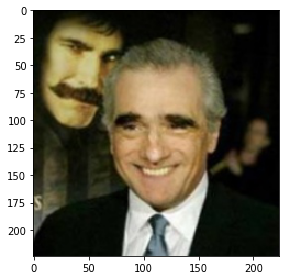

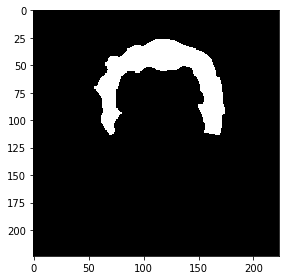

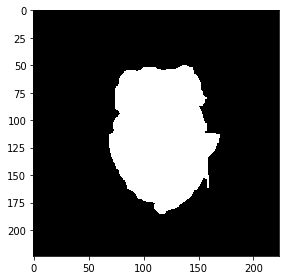

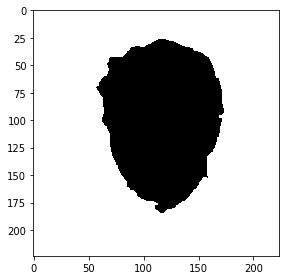

In [0]:
ix = random.randint(0, len(train_ids))
ix= 5
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix,:,:,0]))
plt.show()
imshow(np.squeeze(Y_train[ix,:,:,1]))
plt.show()
imshow(np.squeeze(Y_train[ix,:,:,2]))
plt.show()

In [0]:
Y_train = Y_train.astype(np.bool)

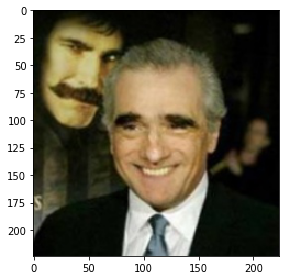

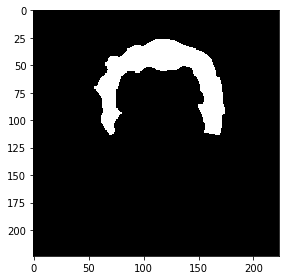

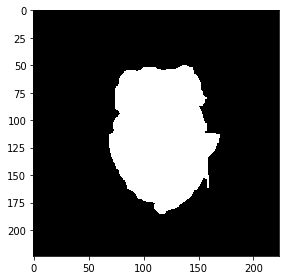

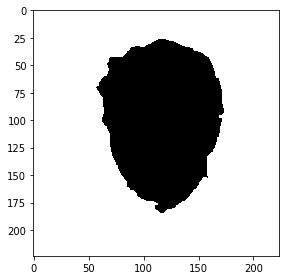

In [0]:
ix = random.randint(0, len(train_ids))
ix = 5
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix,:,:,0]))
plt.show()
imshow(np.squeeze(Y_train[ix,:,:,1]))
plt.show()
imshow(np.squeeze(Y_train[ix,:,:,2]))
plt.show()

In [0]:

from tensorflow.keras import Model
inputs = tf.keras.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255) (inputs)

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = tf.keras.layers.Dropout(0.2) (c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2)) (c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = tf.keras.layers.Dropout(0.2) (c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2)) (c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = tf.keras.layers.Dropout(0.3) (c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2)) (c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = tf.keras.layers.Dropout(0.3) (c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = tf.keras.layers.Dropout(0.4) (c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = tf.keras.layers.Dropout(0.3) (c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = tf.keras.layers.Dropout(0.3) (c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = tf.keras.layers.Dropout(0.2) (c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = tf.keras.layers.Dropout(0.2) (c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='sigmoid') (c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 224, 224, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 224, 224, 16) 0           conv2d_38[0][0]                  
____________________________________________________________________________________________

In [0]:
########## Training ###############

earlystopper = tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint('Hair_Skin_1.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer])

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1792/1800 [============================>.] - ETA: 0s - loss: 0.3687 - accuracy: 0.8403
Epoch 00001: val_loss improved from inf to 0.26421, saving model to Hair_Skin_1.h5
1800/1800 [==============================] - 14s 8ms/sample - loss: 0.3683 - accuracy: 0.8405 - val_loss: 0.2642 - val_accuracy: 0.8957
Epoch 2/50
1792/1800 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9207
Epoch 00002: val_loss improved from 0.26421 to 0.23405, saving model to Hair_Skin_1.h5
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.2067 - accuracy: 0.9209 - val_loss: 0.2340 - val_accuracy: 0.9097
Epoch 3/50
1792/1800 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.9302
Epoch 00003: val_loss improved from 0.23405 to 0.18682, saving model to Hair_Skin_1.h5
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.1792 - accuracy: 0.9303 - val_loss: 0.1868 - val_accuracy: 0.9

In [0]:
from tensorflow.keras.models import Model, load_model

In [0]:
# Predict on train, val and test
model = load_model('Hair_Skin_1.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.6).astype(np.uint8)
preds_val_t = (preds_val > 0.6).astype(np.uint8)
preds_test_t = (preds_test > 0.6).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

1800/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

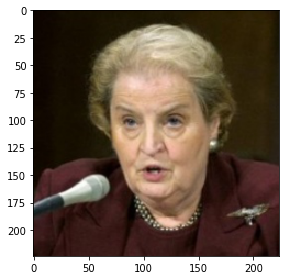

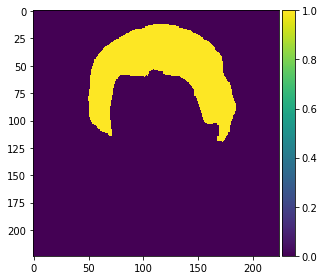

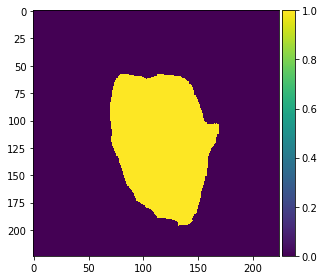

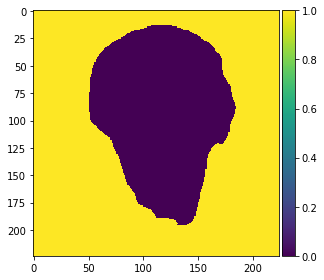

In [0]:
ix = random.randint(0, len(train_ids)) 
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(preds_train_t[ix,:,:,0]))
plt.show()
imshow(np.squeeze(preds_train_t[ix,:,:,1]))
plt.show()
imshow(np.squeeze(preds_train_t[ix,:,:,2]))
plt.show()

In [0]:
print(len(preds_test_upsampled))
print(preds_test_upsampled.shape)

927


AttributeError: ignored

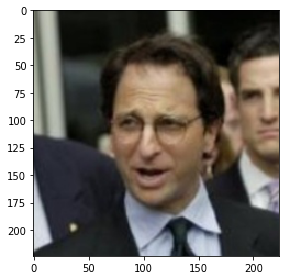

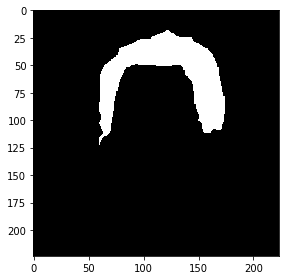

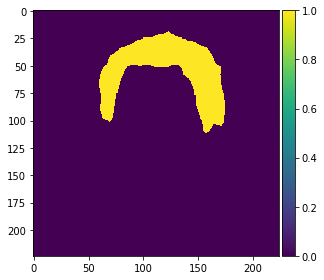

In [0]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix,:,:,0]))
plt.show()
imshow(np.squeeze(preds_val_t[ix,:,:,0]))
plt.show()

In [0]:
print(len(preds_test_upsampled))
print(sizeof(preds_test_upsampled))

927


NameError: ignored

In [0]:
pre_result = np.asarray(preds_test_upsampled)
print(len(pre_result))
print(pre_result.shape)

927
(927, 250, 250, 3)


In [0]:
#labels
from keras.preprocessing.image import array_to_img
from skimage.io import imsave
TEST_MASK = '/content/drive/My Drive/dataset/ml3/test_mask'
img_counter=1
maskId = []
for n in range(0,len(preds_test_upsampled)):
    maskId.append('test_mask_'+str(img_counter)) #/content/drive/My Drive/dataset/ml3/Masks_Final
    imsave('/content/drive/My Drive/dataset/ml3/Masks_Final/'+maskId[n]+'.png',pre_result[n,:,:,0]) #only take hair masks
    img_counter= img_counter + 1
print(maskId)


['test_mask_1', 'test_mask_2', 'test_mask_3', 'test_mask_4', 'test_mask_5', 'test_mask_6', 'test_mask_7', 'test_mask_8', 'test_mask_9', 'test_mask_10', 'test_mask_11', 'test_mask_12', 'test_mask_13', 'test_mask_14', 'test_mask_15', 'test_mask_16', 'test_mask_17', 'test_mask_18', 'test_mask_19', 'test_mask_20', 'test_mask_21', 'test_mask_22', 'test_mask_23', 'test_mask_24', 'test_mask_25', 'test_mask_26', 'test_mask_27', 'test_mask_28', 'test_mask_29', 'test_mask_30', 'test_mask_31', 'test_mask_32', 'test_mask_33', 'test_mask_34', 'test_mask_35', 'test_mask_36', 'test_mask_37', 'test_mask_38', 'test_mask_39', 'test_mask_40', 'test_mask_41', 'test_mask_42', 'test_mask_43', 'test_mask_44', 'test_mask_45', 'test_mask_46', 'test_mask_47', 'test_mask_48', 'test_mask_49', 'test_mask_50', 'test_mask_51', 'test_mask_52', 'test_mask_53', 'test_mask_54', 'test_mask_55', 'test_mask_56', 'test_mask_57', 'test_mask_58', 'test_mask_59', 'test_mask_60', 'test_mask_61', 'test_mask_62', 'test_mask_63', 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
%matplotlib inline  

# encoding function
# based on the implementation: https://www.kaggle.com/rakhlin/fast-run-length-encoding-python/code
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [0]:
# (* update) the input_path using your folder path
input_path = '/content/drive/My Drive/dataset/ml3/Masks_Final/' #/content/drive/My Drive/dataset/ml3/Masks_Final

# get a sorted list of all mask filenames in the folder
masks = [f for f in os.listdir(input_path) if f.endswith('.png')]
masks = sorted(masks, key=lambda s:int(s.split('_')[2].split('.')[0]))

# encode all masks
encodings = []
for file in masks:
    mask = imread(os.path.join(input_path, file))
    #img_size =10
    #mask = resize(mask, (img_size, img_size), mode='constant', preserve_range=True)
    mask = np.array(mask, dtype=np.uint8)
    mask = np.round(mask/255)
    encodings.append(rle_encoding(mask))


# (** update) the path where to save the submission csv file
sub = pd.DataFrame()
sub['ImageId'] = pd.Series(masks).apply(lambda x: os.path.splitext(x)[0])
sub['EncodedPixels'] = pd.Series(encodings).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv(os.path.join('/content/drive/My Drive/dataset/ml3/', 'Hair_Final_1.csv'), index=False)